In [1]:
using ReinforcementLearning, ReinforcementLearningEnvironments, RLIntro.ShortCorridor

In [2]:
using StatsBase, Plots

In [3]:
env = ShortCorridorEnv()
ns, na = length(observation_space(env)), length(action_space(env))

n_feature = 2

2

In [4]:
function run_once(A)
    avg_rewards = []
    for p in A
        agent = Agent(
            π=VBasedPolicy(
                learner=TDLearner(
                    approximator=LinearQApproximator(
                        weights=[-1.47, 1.47],  # init_weights
                        feature_func=(s, a) -> a == 1 ? [0, 1] : [1, 0],
                        actions=[1, 2]
                    ),
                    γ=1.0,
                    optimizer=Descent(0.1)
                ),
                f=obs -> rand() < p ? 2 : 1
            ),
            buffer=episode_RTSA_buffer()
        )
        hook=TotalRewardPerEpisode()
        run(agent, env, StopAfterEpisode(1000); hook=hook)

        push!(avg_rewards, mean(hook.rewards[end-100:end]))
    end
    avg_rewards
end

run_once (generic function with 1 method)

Progress:   0%|█                                        |  ETA: 0:07:51
4m  TRAINING/EPISODE:  0
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  TRAINING/EPISODE:  13


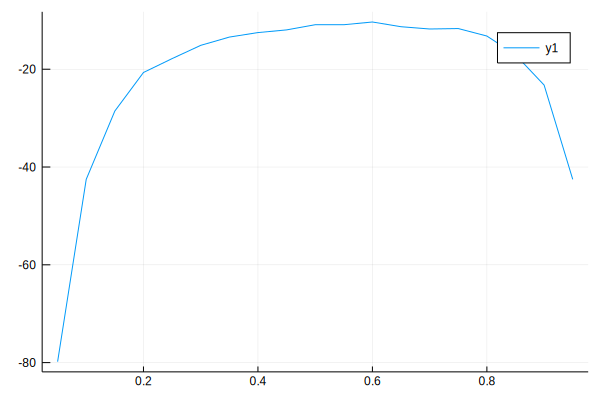

In [5]:
A = 0.05:0.05:0.95
plot(A, mean([run_once(A) for _ in 1:10]))

In [4]:
function run_once_RL(α)
    agent = Agent(
        π=ReinforcePolicy(
            approximator=LinearQApproximator(
                weights=[-1.47, 1.47],  # init_weights
                feature_func=(s, a) -> a == 1 ? [0, 1] : [1, 0],
                actions=[1, 2]
                ),
            α=α,
            γ=1.0
        ),
        buffer=episode_RTSA_buffer()
    )

    hook = TotalRewardPerEpisode()
    run(agent,env,StopAfterEpisode(1000);hook=hook)
    hook.rewards
end

run_once_RL (generic function with 1 method)

Progress:   0%|█                                        |  ETA: 0:03:38
4m  TRAINING/EPISODE:  0
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  TRAINING/EPISODE:  19


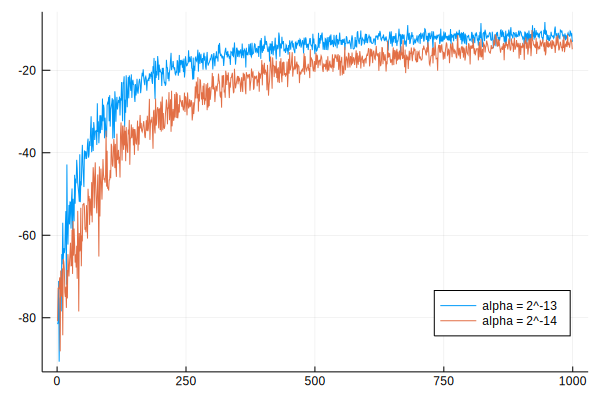

In [6]:
using Random
Random.seed!(123)


function run_once_RL(α)
    agent = Agent(
        π=ReinforcePolicy(
            approximator=LinearQApproximator(
                weights=[-1.47, 1.47],  # init_weights
                feature_func=(s, a) -> a == 1 ? [0, 1] : [1, 0],
                actions=[1, 2]
                ),
            α=α,
            γ=1.0
        ),
        buffer=episode_RTSA_buffer()
    )

    hook = TotalRewardPerEpisode()
    run(agent,ShortCorridorEnv(),StopAfterEpisode(1000);hook=hook)
    hook.rewards
end
p = plot(legend=:bottomright)
for x in [-13, -14]  # for -12, it seems not converage in short time
    plot!(p, mean(run_once_RL(2. ^ x) for _ in 1:100), label="alpha = 2^$x")
end
p

# Exercise

Now can you implement a `ReinforceWithBaselinePolicy` by your self to reproduce the figure 13.2?